In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')# filter out warnings


In [3]:
df = pd.read_csv("C:/Users/User/Downloads/crime_by_district (1).csv")

In [4]:
df

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,Lakshadweep,LAKSHADWEEP,2013,0,0,0,0,0,0,0,0,0,0
9837,Lakshadweep,TOTAL,2013,0,0,0,0,0,0,0,0,0,0
9838,Puducherry,KARAIKAL,2013,0,1,0,0,0,0,0,0,3,0
9839,Puducherry,PUDUCHERRY,2013,0,0,0,0,0,0,0,4,12,1


# Checking for null values 

In [5]:
df.isnull().sum()

STATE/UT                                0
DISTRICT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

# checking Datatype 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              9841 non-null   object
 1   DISTRICT                              9841 non-null   object
 2   Year                                  9841 non-null   int64 
 3   Murder                                9841 non-null   int64 
 4   Assault on women                      9841 non-null   int64 
 5   Kidnapping and Abduction              9841 non-null   int64 
 6   Dacoity                               9841 non-null   int64 
 7   Robbery                               9841 non-null   int64 
 8   Arson                                 9841 non-null   int64 
 9   Hurt                                  9841 non-null   int64 
 10  Prevention of atrocities (POA) Act    9841 non-null   int64 
 11  Protection of Civil Rights (PC

In [7]:
print(df.dtypes)

STATE/UT                                object
DISTRICT                                object
Year                                     int64
Murder                                   int64
Assault on women                         int64
Kidnapping and Abduction                 int64
Dacoity                                  int64
Robbery                                  int64
Arson                                    int64
Hurt                                     int64
Prevention of atrocities (POA) Act       int64
Protection of Civil Rights (PCR) Act     int64
Other Crimes Against SCs                 int64
dtype: object


In [8]:
# 3. Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

Number of duplicate rows: 2


In [9]:
# Check column names
print(df.columns)
df["Total Crime"] = df[crime_columns].sum(axis=1)

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Assault on women',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')


In [10]:
df['STATE/UT'] = df['STATE/UT'].str.strip().str.title()
df['DISTRICT'] = df['DISTRICT'].str.strip().str.title()

In [38]:
df.head()

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Total Crimes
0,Andhra Pradesh,Adilabad,2001,0,1,4,0,0,0,3,0,15,32,55
1,Andhra Pradesh,Anantapur,2001,0,4,0,0,0,0,49,21,0,53,127
2,Andhra Pradesh,Chittoor,2001,3,3,0,0,0,0,38,36,0,34,114
3,Andhra Pradesh,Cuddapah,2001,0,3,0,0,0,0,20,52,0,25,100
4,Andhra Pradesh,East Godavari,2001,1,3,0,0,0,0,3,12,63,7,89


# 1 Calculate mean, median, and standard deviation for each crime type and creating a list for crime columns

In [12]:
crime_columns = ['Murder', 'Assault on women', 'Kidnapping and Abduction', 
                 'Dacoity', 'Robbery', 'Arson', 'Hurt', 
                 'Prevention of atrocities (POA) Act', 
                 'Protection of Civil Rights (PCR) Act', 
                 'Other Crimes Against SCs']

mean_values = df[crime_columns].mean()
median_values = df[crime_columns].median()
std_values = df[crime_columns].std()



In [13]:
crime_columns 

['Murder',
 'Assault on women',
 'Kidnapping and Abduction',
 'Dacoity',
 'Robbery',
 'Arson',
 'Hurt',
 'Prevention of atrocities (POA) Act',
 'Protection of Civil Rights (PCR) Act',
 'Other Crimes Against SCs']

In [14]:
# Display descriptive statistics for numerical columns
df.describe()

,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
count,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000
mean,2007.162517,1.743267,3.657181,1.078362,0.089440,0.206322,0.590710,10.988109,28.161195,0.880577,35.875292
std,3.755258,11.888712,19.545035,8.344658,0.716836,1.466755,3.697397,52.543309,160.224252,8.554471,209.916734
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000
75%,2010.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,15.000000,0.000000,20.000000
max,2013.000000,423.000000,412.000000,363.000000,26.000000,83.000000,178.000000,1252.000000,5584.000000,459.000000,5339.000000


In [15]:
std_values

Murder                                   11.888712
Assault on women                         19.545035
Kidnapping and Abduction                  8.344658
Dacoity                                   0.716836
Robbery                                   1.466755
Arson                                     3.697397
Hurt                                     52.543309
Prevention of atrocities (POA) Act      160.224252
Protection of Civil Rights (PCR) Act      8.554471
Other Crimes Against SCs                209.916734
dtype: float64

In [16]:
median_values

Murder                                  0.0
Assault on women                        0.0
Kidnapping and Abduction                0.0
Dacoity                                 0.0
Robbery                                 0.0
Arson                                   0.0
Hurt                                    0.0
Prevention of atrocities (POA) Act      2.0
Protection of Civil Rights (PCR) Act    0.0
Other Crimes Against SCs                2.0
dtype: float64

In [17]:

mean_values 

Murder                                   1.743267
Assault on women                         3.657181
Kidnapping and Abduction                 1.078362
Dacoity                                  0.089440
Robbery                                  0.206322
Arson                                    0.590710
Hurt                                    10.988109
Prevention of atrocities (POA) Act      28.161195
Protection of Civil Rights (PCR) Act     0.880577
Other Crimes Against SCs                35.875292
dtype: float64

In [18]:
df['Total Crimes'] = df[crime_columns].sum(axis=1)

In [39]:
df.head()

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Total Crimes
0,Andhra Pradesh,Adilabad,2001,0,1,4,0,0,0,3,0,15,32,55
1,Andhra Pradesh,Anantapur,2001,0,4,0,0,0,0,49,21,0,53,127
2,Andhra Pradesh,Chittoor,2001,3,3,0,0,0,0,38,36,0,34,114
3,Andhra Pradesh,Cuddapah,2001,0,3,0,0,0,0,20,52,0,25,100
4,Andhra Pradesh,East Godavari,2001,1,3,0,0,0,0,3,12,63,7,89


# 2.  Trend of Total Crimes Against SCs Over the Year

In [20]:
yearly_crime = df.groupby('Year')['Total Crimes'].sum().reset_index()

In [21]:
yearly_crime

,Year,Total Crimes
0,2001,67003
1,2002,67014
2,2003,52502
3,2004,53775
4,2005,52254
5,2006,54146
6,2007,60062
7,2008,66860
8,2009,66824
9,2010,65286


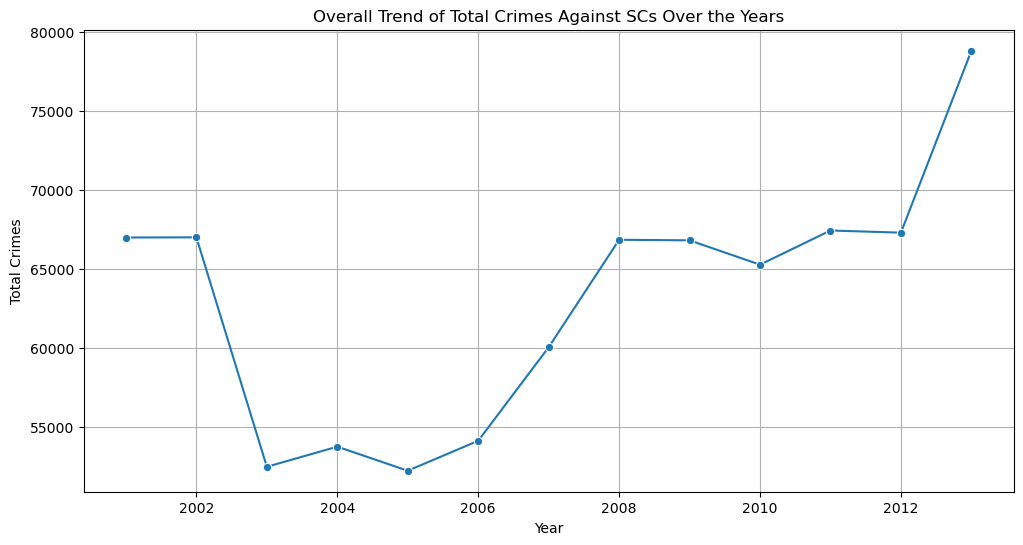

In [22]:

# Plot the overall trend of crimes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_crime, x='Year', y='Total Crimes', marker='o')
plt.title('Overall Trend of Total Crimes Against SCs Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()

# 3. Distribution Analysis of Each Crime Type

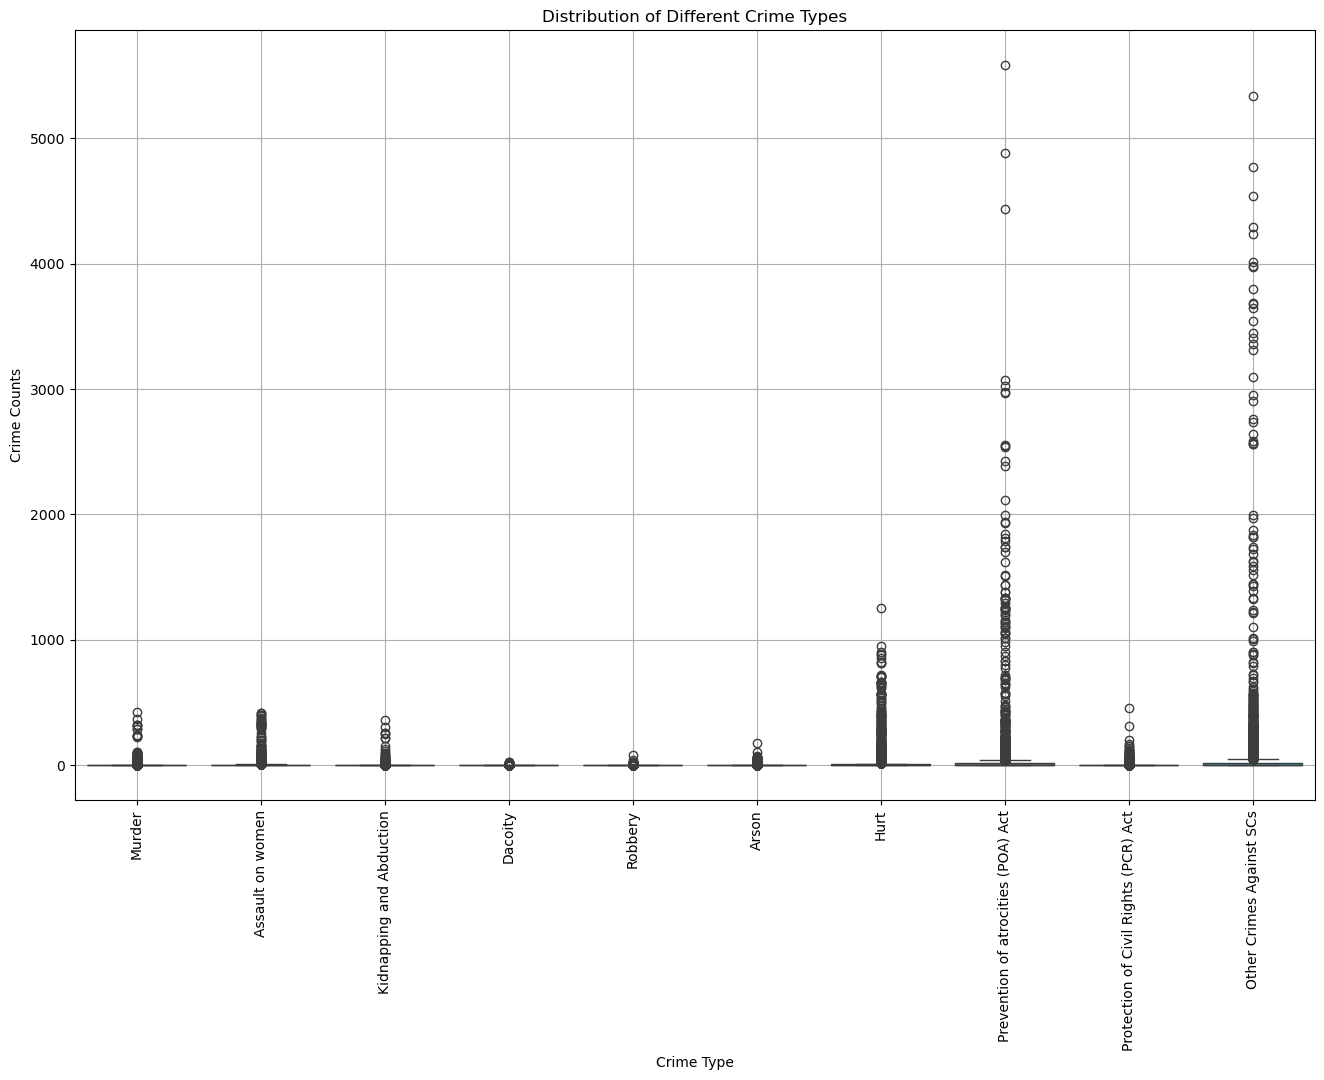

In [23]:
# Plot the distribution of each crime type
plt.figure(figsize=(16, 10))
sns.boxplot(data=df[crime_columns])
plt.title('Distribution of Different Crime Types')
plt.xticks(rotation=90)
plt.xlabel('Crime Type')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.show()


# 4. Analyze Crime Counts Across States

In [24]:
# Calculate total crimes per state
statewise_crime = df.groupby('STATE/UT')['Total Crimes'].sum().sort_values(ascending=False).reset_index()



In [25]:
statewise_crime

,STATE/UT,Total Crimes
0,Uttar Pradesh,167102
1,Rajasthan,122954
2,Madhya Pradesh,105510
3,Andhra Pradesh,93378
4,Bihar,80124
5,Karnataka,53944
6,Odisha,41996
7,Tamil Nadu,40936
8,Gujarat,30260
9,Maharashtra,26174


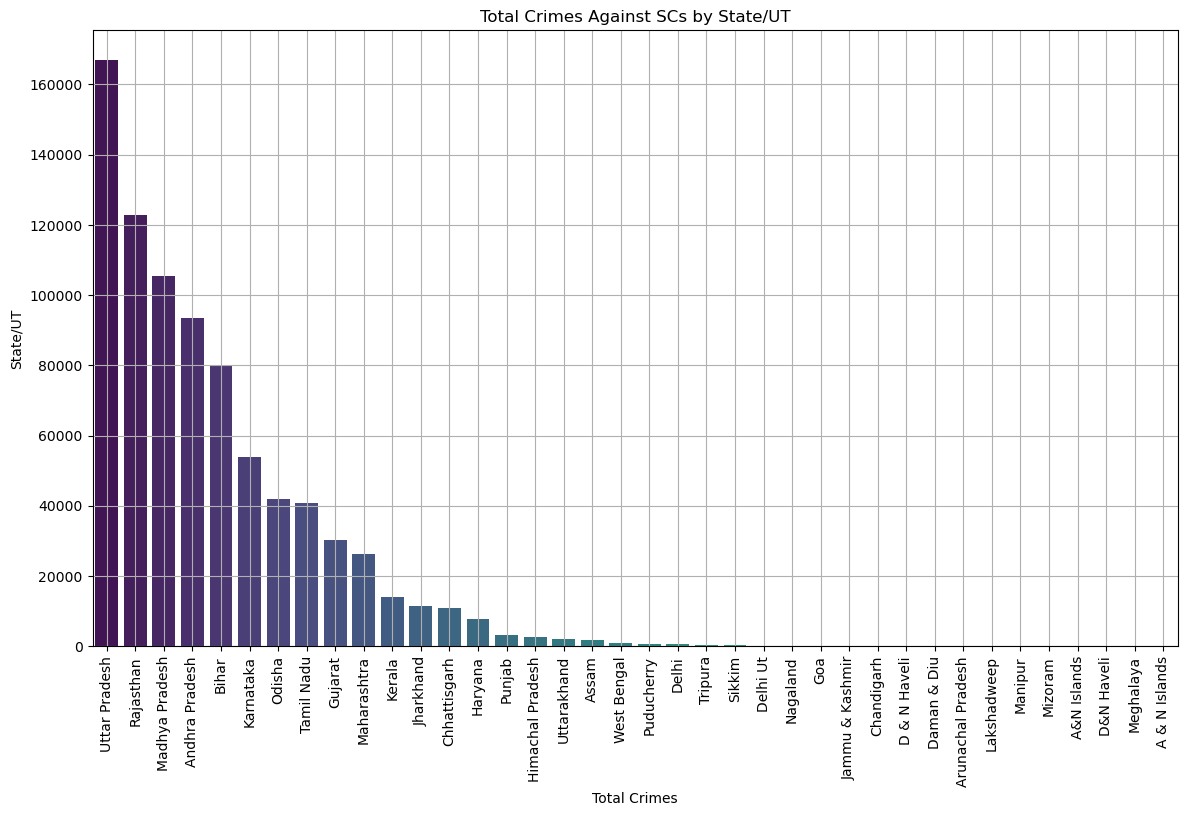

In [26]:
# Plot the total crimes per state
plt.figure(figsize=(14, 8))
sns.barplot(data=statewise_crime, x='STATE/UT', y='Total Crimes', palette='viridis')
plt.title('Total Crimes Against SCs by State/UT')
plt.xlabel('Total Crimes')
plt.ylabel('State/UT')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()


# 5. Time Series Analysis: Year-wise Total Crime Counts

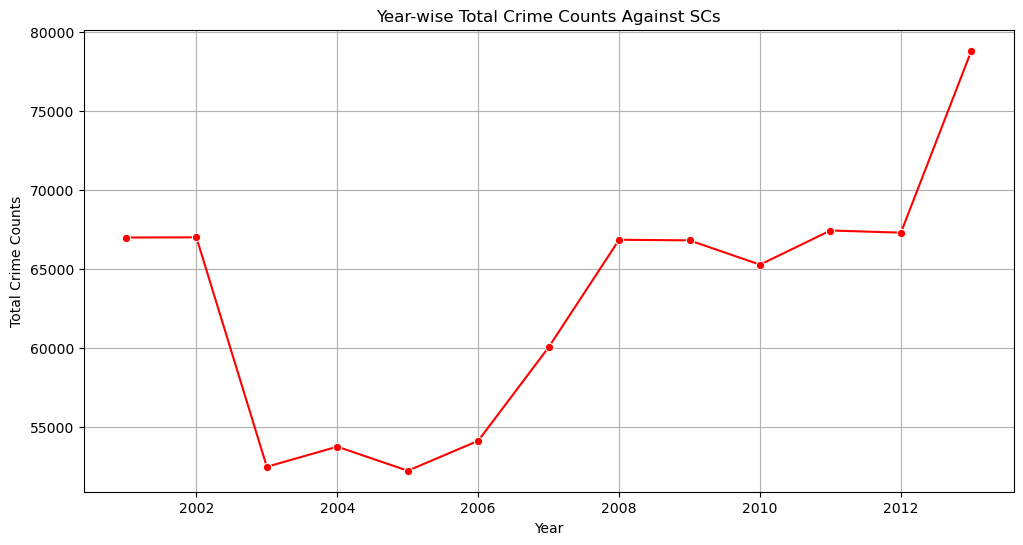

In [27]:
# Group data by year and plot the trend of total crimes
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_crime, x='Year', y='Total Crimes', marker='o', color='red')
plt.title('Year-wise Total Crime Counts Against SCs')
plt.xlabel('Year')
plt.ylabel('Total Crime Counts')
plt.grid(True)
plt.show()


# 6. State-wise Heatmap of Crime Distribution

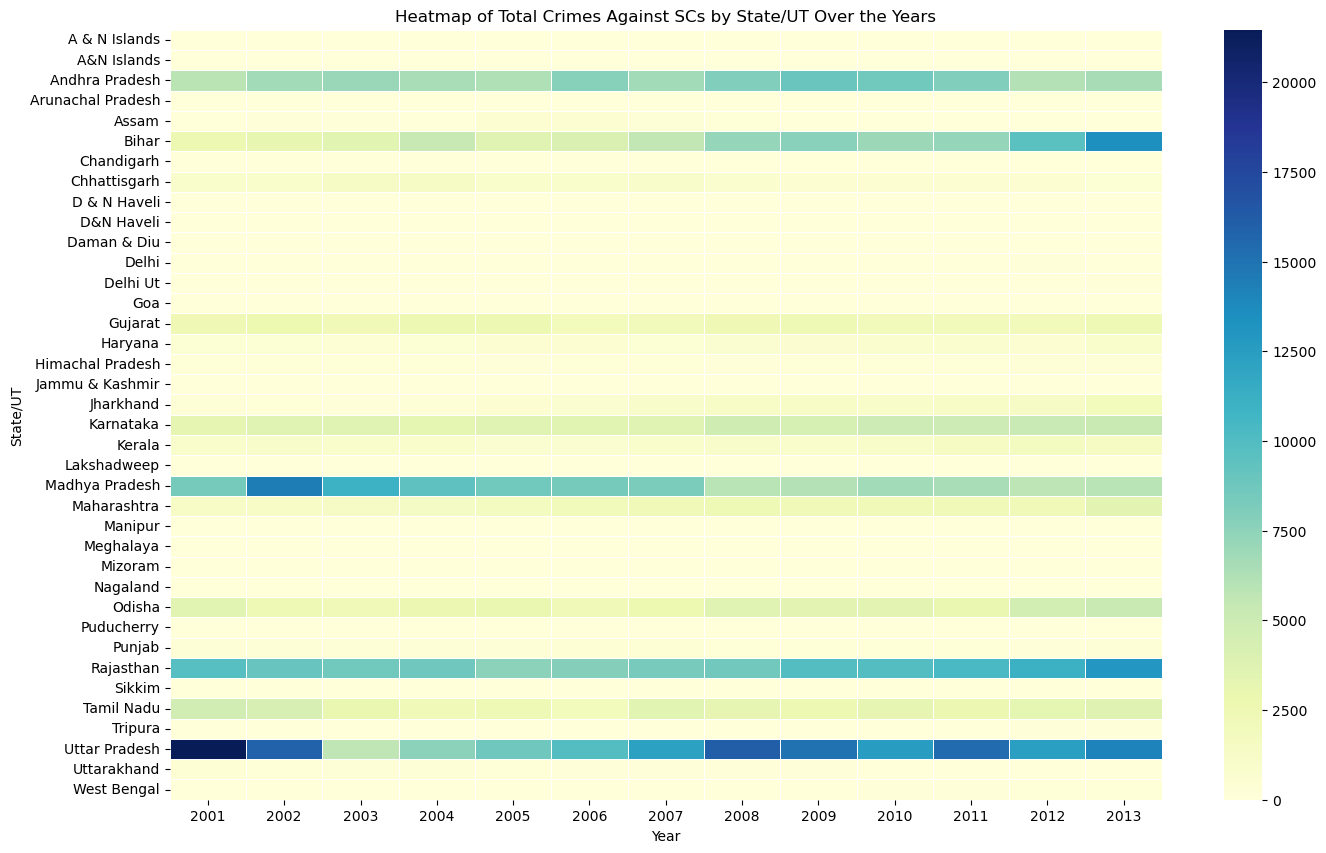

In [28]:
# Create a pivot table for heatmap visualization
heatmap_data = df.pivot_table(values='Total Crimes', index='STATE/UT', columns='Year', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, linewidths=0.6)
plt.title('Heatmap of Total Crimes Against SCs by State/UT Over the Years')
plt.xlabel('Year')
plt.ylabel('State/UT')
plt.show() 



# 7. Frequency of Different Crime Types

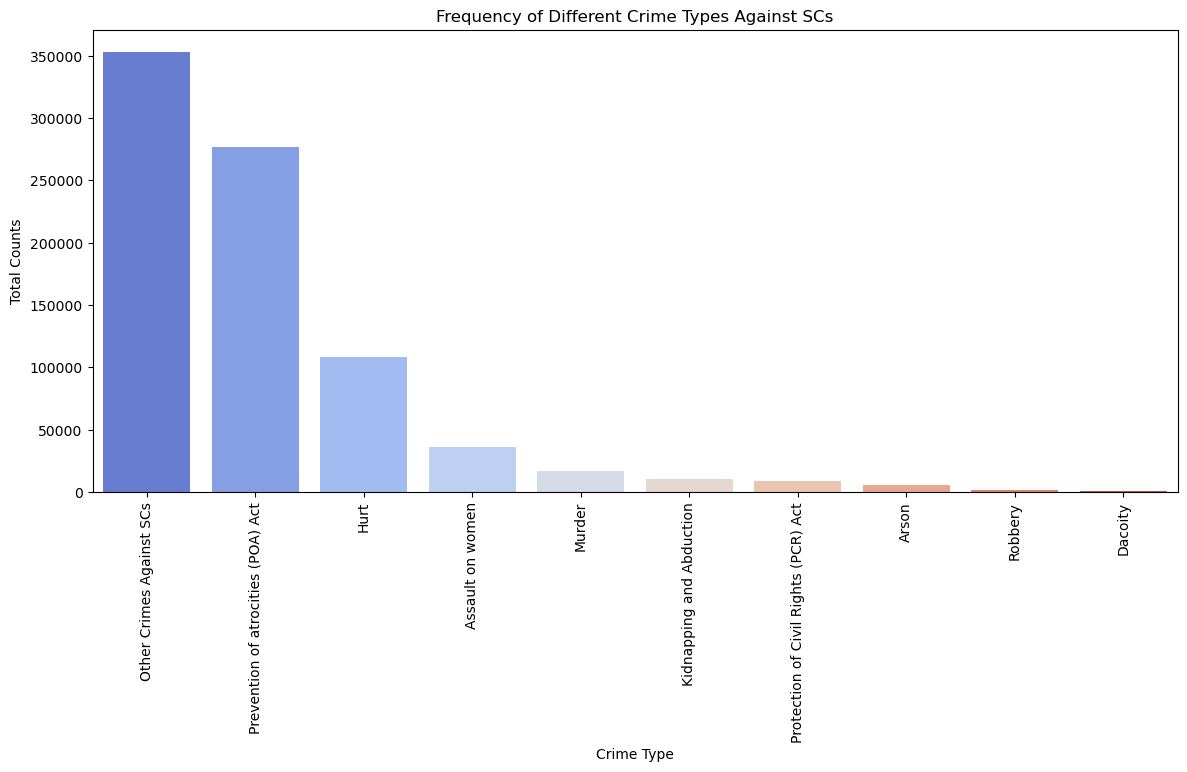

In [29]:
# Sum the total number of each crime type
crime_type_totals = df[crime_columns].sum().sort_values(ascending=False)

# Plot the total counts of each crime type
plt.figure(figsize=(14, 6))
sns.barplot(x=crime_type_totals.index, y=crime_type_totals.values, palette='coolwarm')
plt.title('Frequency of Different Crime Types Against SCs')
plt.xticks(rotation=90)
plt.xlabel('Crime Type')
plt.ylabel('Total Counts')
plt.show()


# 8. Trend Analysis of Common Crime Types Over the Years

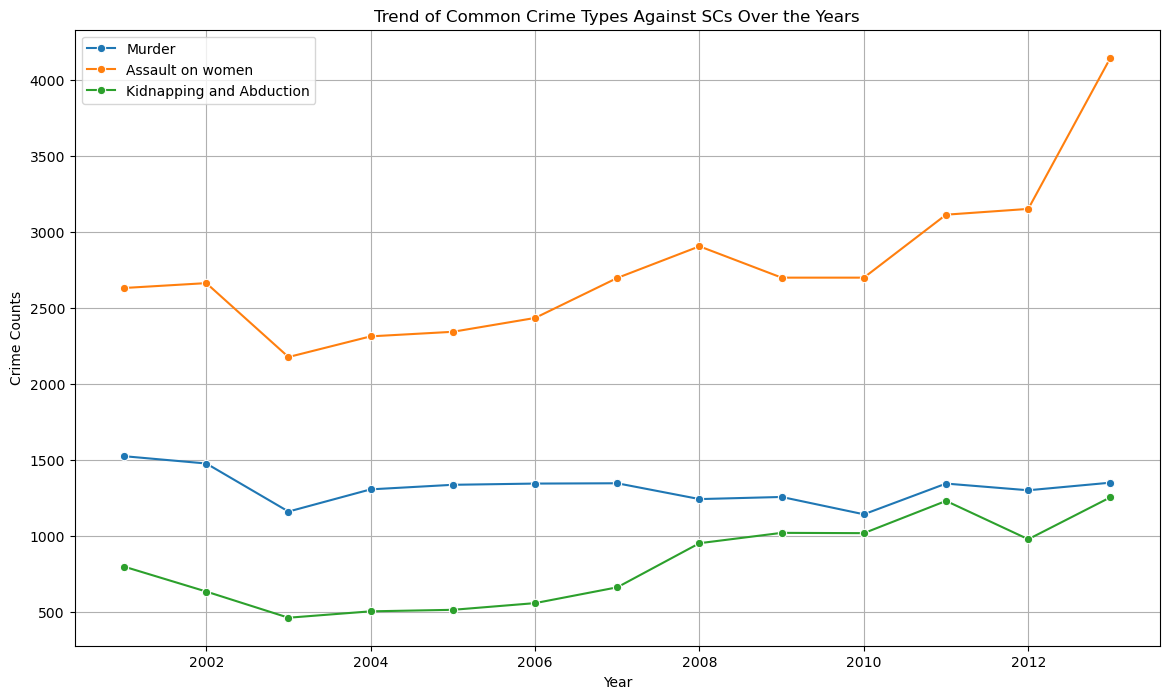

In [30]:
# Analyze trends for selected crime types
selected_crimes = ['Murder', 'Assault on women', 'Kidnapping and Abduction']

plt.figure(figsize=(14, 8))
for crime in selected_crimes:
    sns.lineplot(data=df.groupby('Year')[crime].sum().reset_index(), x='Year', y=crime, marker='o', label=crime)

plt.title('Trend of Common Crime Types Against SCs Over the Years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
df[["STATE/UT"]].value_counts()

STATE/UT         
Uttar Pradesh        955
Madhya Pradesh       683
Maharashtra          598
Bihar                585
Tamil Nadu           509
Rajasthan            498
Odisha               467
Karnataka            435
Gujarat              419
Andhra Pradesh       404
Assam                396
Jammu & Kashmir      353
Punjab               343
Jharkhand            339
West Bengal          339
Chhattisgarh         294
Haryana              293
Kerala               254
Arunachal Pradesh    214
Himachal Pradesh     192
Delhi                183
Uttarakhand          182
Nagaland             150
Manipur              136
Mizoram              119
Meghalaya            108
Tripura               77
Sikkim                65
Daman & Diu           39
Goa                   39
A & N Islands         36
Puducherry            34
Lakshadweep           26
Chandigarh            26
D & N Haveli          24
Delhi Ut              19
A&N Islands            4
D&N Haveli             2
Name: count, dtype: int64

# 9. Percentage Distribution of Different Crime Types Against SCs

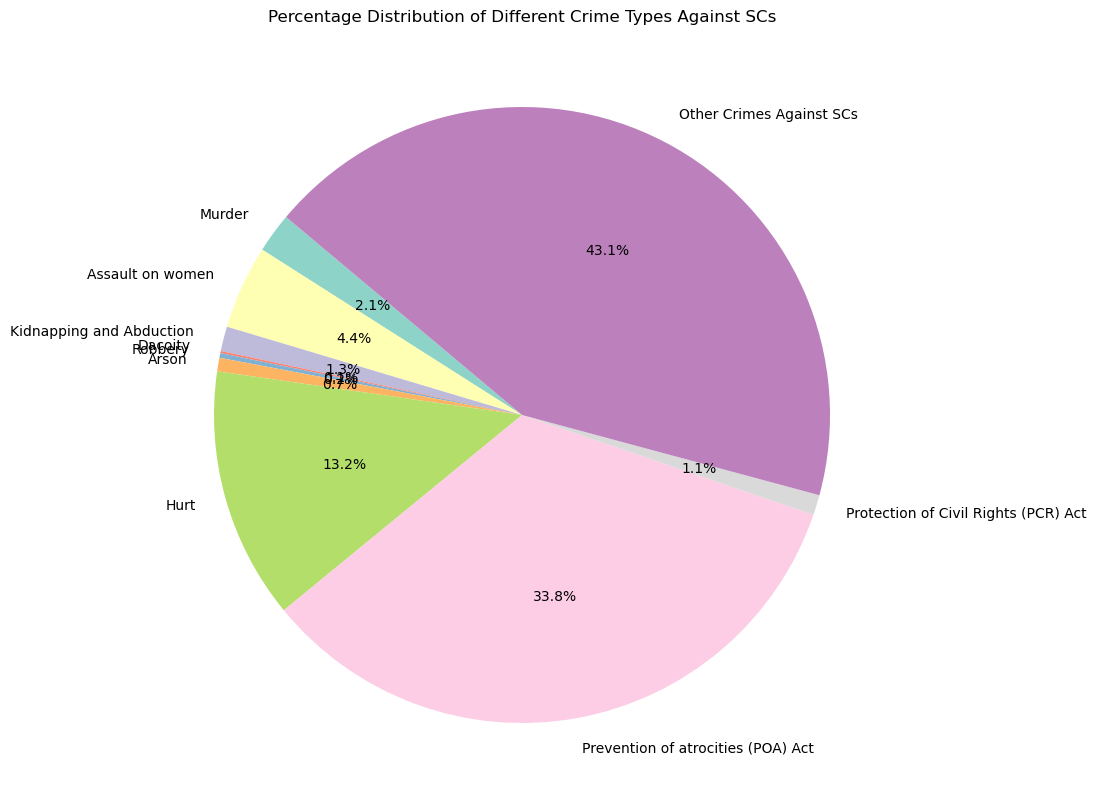

In [40]:
# Calculate total counts for each crime type
crime_type_totals = df[crime_columns].sum()

# Pie chart for percentage distribution of different crime types
plt.figure(figsize=(10, 10))
plt.pie(crime_type_totals, labels=crime_type_totals.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'), startangle=140)
plt.title('Percentage Distribution of Different Crime Types Against SCs')
plt.show()


# 10. Crime Data in Uttar Pradesh by Year

In [51]:
UP_state = df[df["STATE/UT"] == 'Uttar Pradesh'][["DISTRICT", "Year"] + crime_columns]
# Display the first few rows of the new DataFrame
UP_state

,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
579,Agra,2001,11,15,8,2,2,2,18,215,0,103
580,Aligarh,2001,8,12,9,2,0,3,8,1,0,131
581,Allahabad,2001,6,9,6,0,4,7,36,268,0,109
582,Ambedkar Nagar,2001,2,2,2,0,0,0,6,82,0,7
583,Auraiya,2001,1,2,2,0,0,1,17,1,0,57
...,...,...,...,...,...,...,...,...,...,...,...,...
9757,St.Ravidasnagar,2013,0,3,2,0,0,0,0,12,0,4
9758,Sultanpur,2013,1,2,2,0,0,4,8,51,0,47
9759,Unnao,2013,6,13,10,0,0,1,1,0,0,191
9760,Varanasi,2013,0,2,0,0,0,1,0,130,0,0


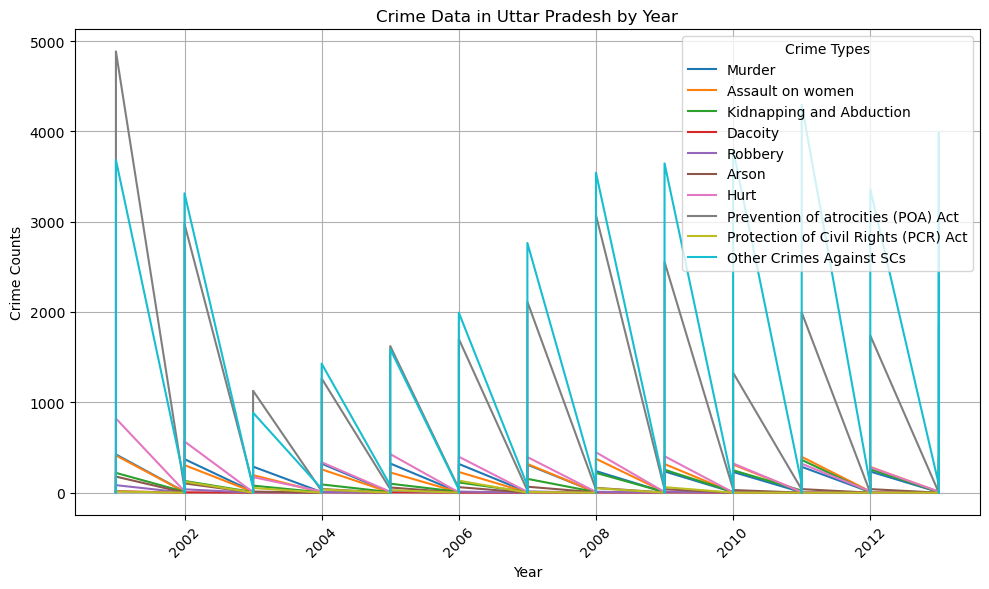

In [52]:
# Plotting crime data for each district over the years
plt.figure(figsize=(10, 6))

# Iterate over each crime column to create a separate line for each crime type
for crime_column in crime_columns:
    plt.plot(UP_state['Year'], UP_state[crime_column], label=crime_column)

plt.title('Crime Data in Uttar Pradesh by Year')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.legend(title='Crime Types')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 11. Trends of Crimes under POA Act and PCR Act Over the Years'

In [36]:
df_acts = df[["Year", "Prevention of atrocities (POA) Act", "Protection of Civil Rights (PCR) Act"]].groupby("Year").sum().reset_index()

In [37]:
df_acts

,Year,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act
0,2001,26227,1266
1,2002,21540,2036
2,2003,16096,1268
3,2004,17783,728
4,2005,16994,582
5,2006,17162,810
6,2007,19638,412
7,2008,22930,558
8,2009,22074,336
9,2010,20838,286


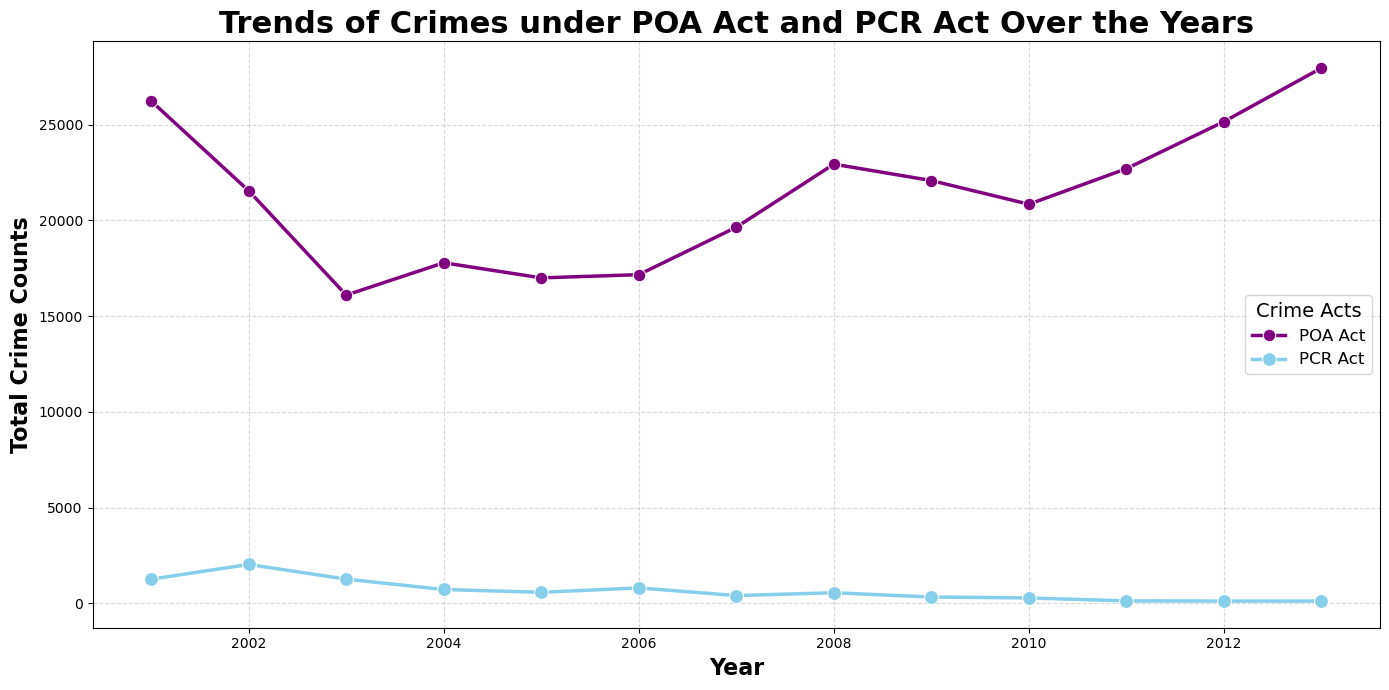

In [43]:
# Plotting the POA Act and PCR Act trends over the years
plt.figure(figsize=(14, 7))

# Enhanced line plot for each act with markers
sns.lineplot(data=df_acts, x="Year", y="Prevention of atrocities (POA) Act", 
             marker='o', label="POA Act", color='purple', linewidth=2.5, markersize=9)

sns.lineplot(data=df_acts, x="Year", y="Protection of Civil Rights (PCR) Act", 
             marker='o', label="PCR Act", color='skyblue', linewidth=2.5, markersize=10)

# Adding titles and labels with custom fonts and sizes
plt.title('Trends of Crimes under POA Act and PCR Act Over the Years', fontsize=22, fontweight='bold')
plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Total Crime Counts', fontsize=16, fontweight='bold')

# Customizing the legend
plt.legend(title='Crime Acts', fontsize=12, title_fontsize=14, frameon=True)

# Improved grid visibility
plt.grid(visible=True, linestyle='--', linewidth=0.8, alpha=0.5)

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()
